In [18]:
from nuclr.config import NUCLR
from nuclr.train import Trainer
import torch

In [89]:
model_path = "sample_model/"
trainer = Trainer.from_path(model_path)

No sn, sp or binding data, skipping leave one out


In [21]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

In [30]:
proton_embs, neutron_embs, task_embs = trainer.models[1].emb
proton_embs = proton_embs.weight.detach().cpu().numpy()
neutron_embs = neutron_embs.weight.detach().cpu().numpy()
task_embs = task_embs.weight.detach().cpu().numpy()

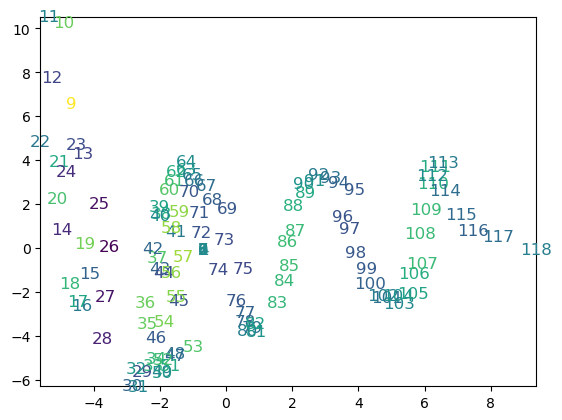

In [45]:
pca = PCA(n_components=3)

def show_plot(proton_embs):
    pca.fit(proton_embs)
    proton_embs_pca = pca.transform(proton_embs)

    cmap = plt.get_cmap('viridis', len(proton_embs_pca))
    pc3 = proton_embs_pca[:,2]
    pc3 = (pc3 - min(pc3)) / (max(pc3) - min(pc3))
    for i, point in enumerate(proton_embs_pca):
        c = cmap(pc3[i])
        plt.text(point[0], point[1], str(i), color=c, fontsize=12, verticalalignment='center', horizontalalignment='center')
    plt.xlim(min(proton_embs_pca[:,0]), max(proton_embs_pca[:,0]))
    plt.ylim(min(proton_embs_pca[:,1]), max(proton_embs_pca[:,1]))
    plt.show()
    return pca, proton_embs_pca

pca, embs_pca = show_plot(proton_embs)

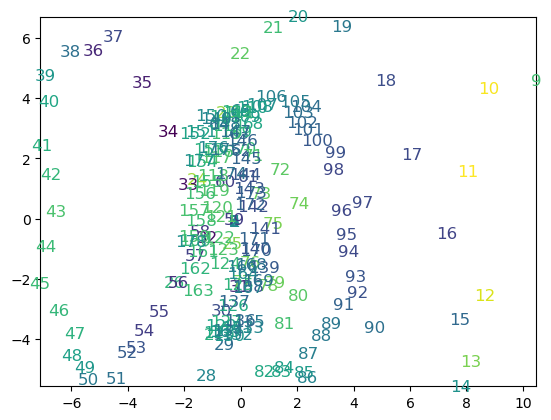

In [46]:
pca, embs_pca = show_plot(neutron_embs)

In [65]:
model = trainer.models[1].cpu()
task_names = list(trainer.data.output_map.keys())

In [74]:
magic_numbers = [2, 8, 20, 28, 50, 82, 126]

In [80]:
import seaborn as sns
sns.set()
plt.rc('text', usetex=False)

In [86]:
# Z fixed and move along N see how BE changes.
task_name = "binding_semf"
task_idx = task_names.index(task_name)
protons = 82
max_neutrons = 120
inputs = torch.full((max_neutrons - 9, 3), protons)
inputs[:, 1] = torch.arange(9, max_neutrons)
inputs[:, 2] = task_idx
preds = model(inputs)

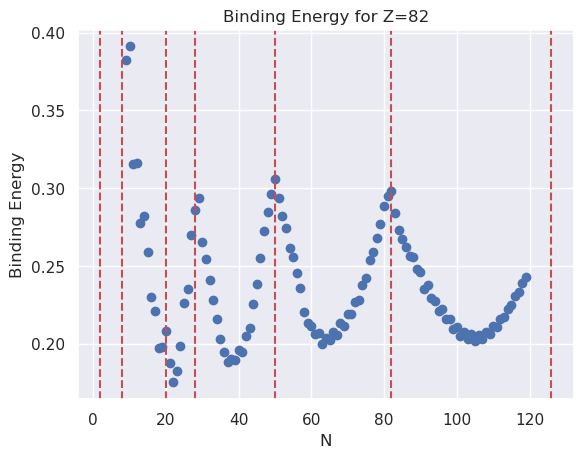

In [88]:
plt.scatter(inputs[:, 1], preds[:, task_idx].detach().cpu().numpy())
for magic_number in magic_numbers:
    plt.axvline(magic_number, color='r', linestyle='--')
plt.xlabel("N")
plt.ylabel("Binding Energy")
plt.title(f"Binding Energy for Z={protons}")
plt.savefig(f"../plots/Z_{protons}_binding_energy.pdf", bbox_inches='tight', pad_inches=0)